In [1]:
# linear reggres
from sklearn.linear_model import LinearRegression

# model selection
from sklearn.model_selection import train_test_split 

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')

### 학습목표
- 기울기(w)
- 절편(b)
- 회귀 평가 지표
- 피쳐, 타겟의 스케일링

### 1. 기울기 & 절편

In [2]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

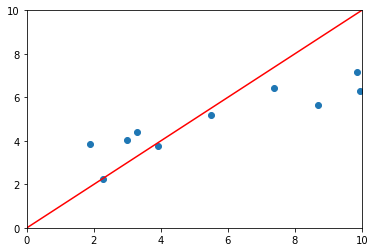

In [7]:
# f(x) = w*x+b -->cost(w,b)
w = 1 # 조절-->선의 기울기가 달라짐
b =0 # 조절--> 절편이 만들어짐

plt.figure()

plt.scatter(X,Y)
plt.plot([0,10], [b,10*w+b], c='r')

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()
plt.close()

함수로 풀어보기

In [49]:
# w * x.T + b
def prediction(a, b, x) :
    result =  x*a.T + b
    return result

In [50]:
def update_ab(a, b, x , error , lr) :
    a_delta = -(lr * (2/len(error)) * (np.dot(x.T , error)) ) 
    b_delta = -(lr * (2/len(error)) * np.sum(error) ) 
    return a_delta , b_delta

In [51]:
def gradient_descent(x, y , iters) :
    a = np.zeros((1,1)) # (0,0)으로 잡아줌
    b = np.zeros((1,1))
    
    for idx in range(iters) :
        error = y - prediction(a, b , x)
        a_delta , b_delta = update_ab(a, b, x, error , lr=learning_rate )    
        a -= a_delta
        b -= b_delta
    return a, b

In [52]:
def plotting_graph(x, y, a, b) :
    y_pred = a * x + b
    
    plt.figure()
    
    plt.scatter(x,y)
    plt.plot(x , y_pred , c='red')
    
    plt.show()
    plt.close()

weight :  [[3.36959948]] bias :  [[1.35855893]]


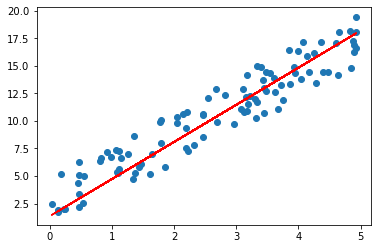

In [53]:
learning_rate = 0.005

x = 5*np.random.rand(100, 1)
y = 3*x + 5*np.random.rand(100, 1)

w , b = gradient_descent(x, y, iters=100)
print('weight : ' , w , 'bias : ' , b)
plotting_graph(x, y, w, b)

### 2. 회귀 평가 지표

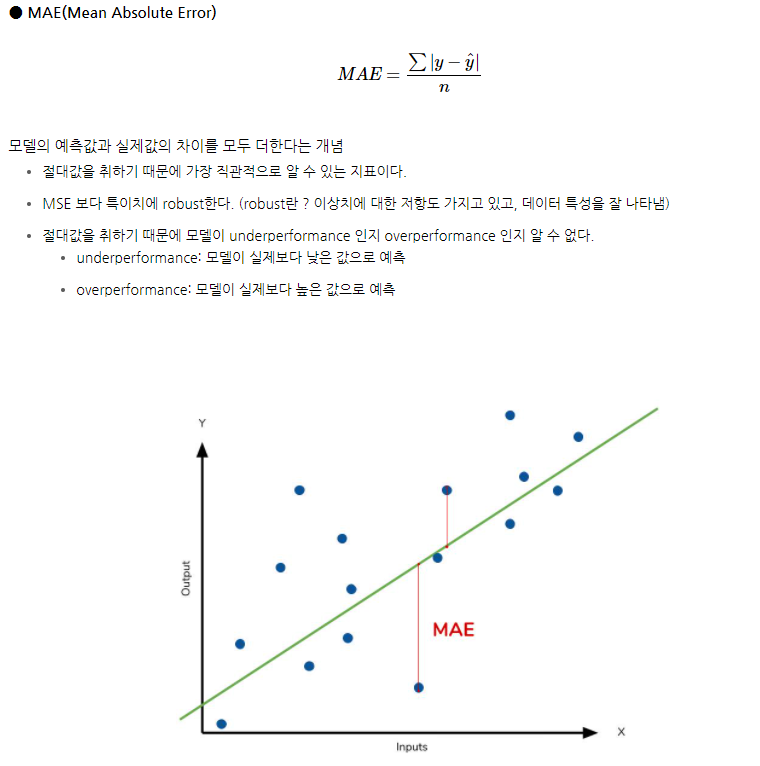

In [59]:
from IPython.display import Image
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-mae.png', width=700)

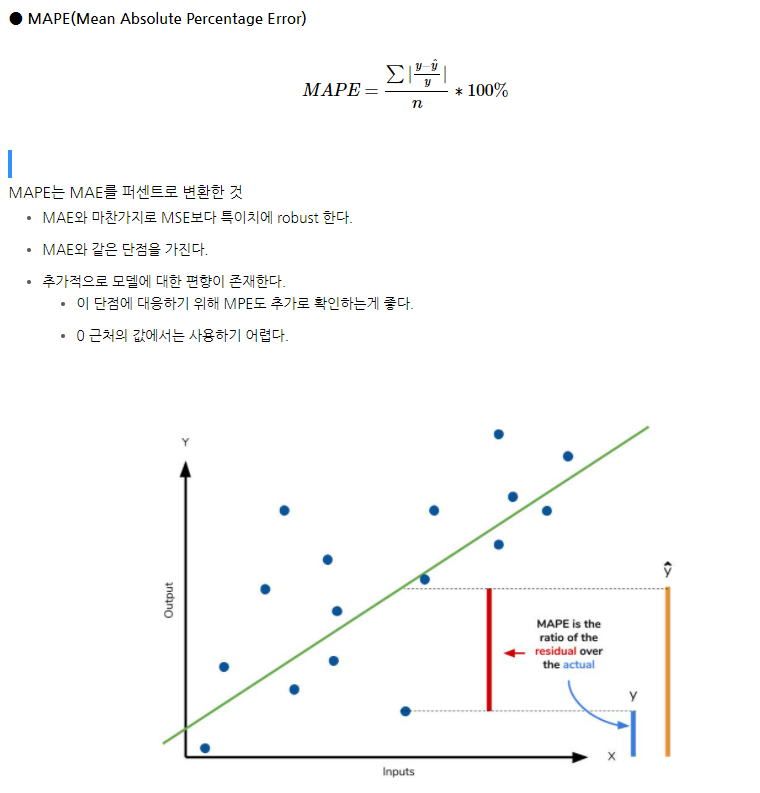

In [60]:
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-mape.png', width=700)

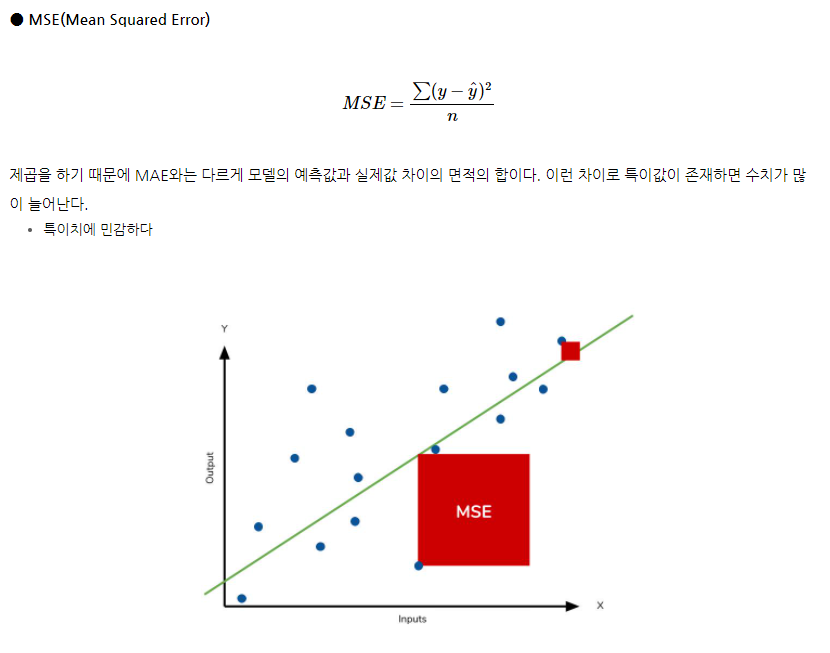

In [61]:
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-mse.png', width=700)

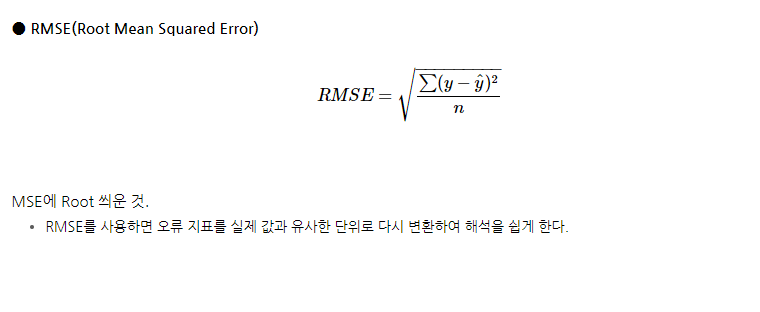

In [62]:
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-rmse.png', width=700)

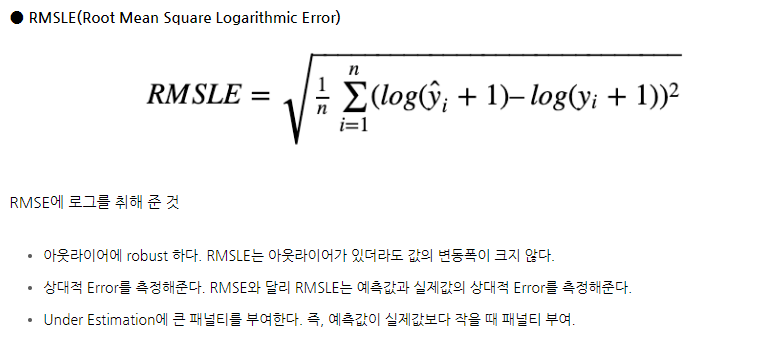

In [63]:
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-rmsle.png', width=700)

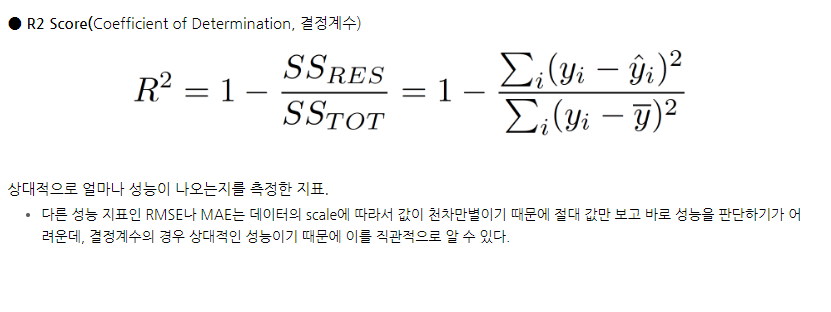

In [64]:
Image('C:/Users/ruby/Jupyter/numpy_img/regression-eval-R2-Score.png', width=700)

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()

1) data, target --> dataframe / target --> target_name

In [88]:
featureDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
targetDF = pd.DataFrame(data = iris.target, columns = ['species'])

In [89]:
def converter(specie):
    if specie == 0 :
        return 'setosa'
    elif specie == 1 :
        return 'versicolor' 
    else :
        return 'verginica'

In [90]:
targetDF['species'] = targetDF['species'].apply(converter)
targetDF

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,verginica
146,verginica
147,verginica
148,verginica


In [91]:
irisDF = pd.concat([featureDF, targetDF], axis=1)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,verginica
146,6.3,2.5,5.0,1.9,verginica
147,6.5,3.0,5.2,2.0,verginica
148,6.2,3.4,5.4,2.3,verginica


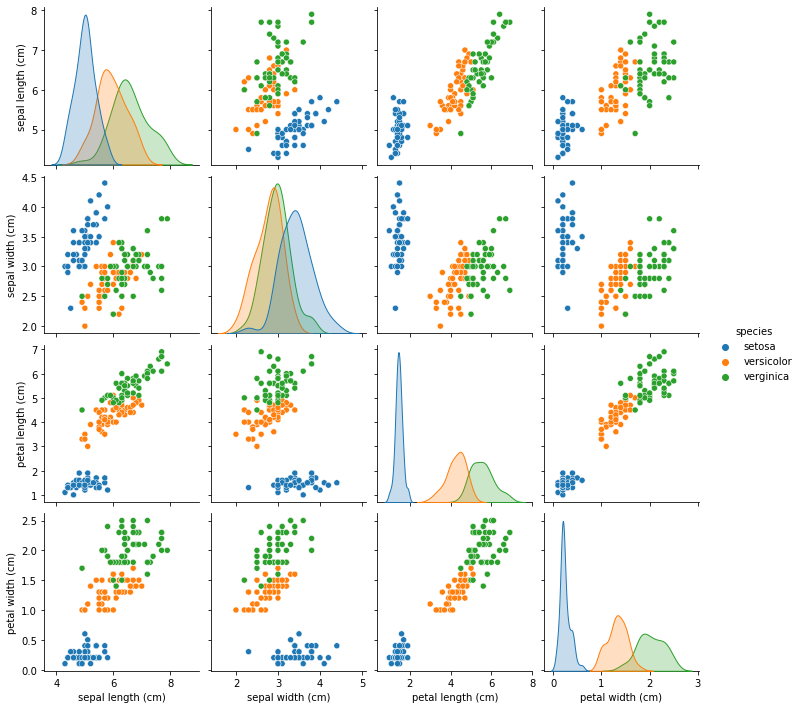

In [92]:
sns.pairplot(irisDF, hue='species')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_absolute_error, mean_squared_error

In [98]:
targetDF = pd.DataFrame(data=iris.target, columns=['species'])
irisDF = pd.concat([irisDF, targetDF], axis=1)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [99]:
X = irisDF.drop('sepal length (cm)', axis=1)
Y = irisDF['sepal length (cm)']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R : ', lr_model.score(X,Y))

mae :  0.2890424868777998
mse :  0.12227797110201433
rmse :  0.34968267200708464
R :  0.8587106939330678


In [108]:
# 비교
print(irisDF.loc[0])
print(y_pred[0])

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
species              0.0
species              0.0
Name: 0, dtype: float64
6.39044386067281


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

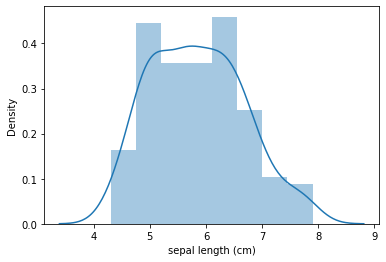

In [109]:
# Y의 밀도
sns.distplot(Y)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

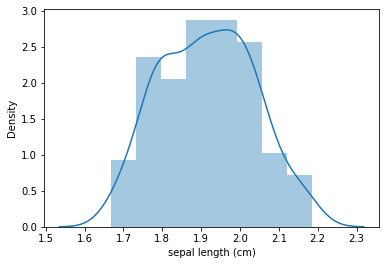

In [111]:
# target은 로그변환을 통한 스케일링 작업이 필요함
logY = np.log1p(Y)
sns.distplot(logY)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, logY, test_size=.2, random_state=100) # target스케일링만 해봄

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R : ', lr_model.score(X,logY))

mae :  0.03977866805458681
mse :  0.0022196391045392135
rmse :  0.04711304601211021
R :  0.8636380066281042


In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

In [115]:
scalX = feature_scaling(method='MinMax', input_data=X) # Standard / MinMax

In [116]:
X_train, X_test, y_train, y_test = train_test_split(scalX, logY, test_size=.2, random_state=100) # target, feature 스케일링

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R : ', lr_model.score(scalX,logY))

mae :  0.03977866805458688
mse :  0.0022196391045392174
rmse :  0.04711304601211025
R :  0.8636380066281042
